# Simulated Temperature Sensing Code. 

This is a script that can be used to analyse the results of the simulated temperture sensing experiments once one of the temperature sensing algorthims has been used to look at the data and save it to a text file. 

In [1]:
import numpy as np 
import pandas as pd 
import scipy.optimize as opt 
import os 
import matplotlib.pyplot as plot

In [10]:
def load_kuscko_data(file_name):
    '''Load in the data from the Kuscko tempearture sensing analysis from a 
    text file.'''
    
    data_file = pd.read_table(file_name)
    return(data_file)

In [4]:
def load_analysis_data(file_name):
    '''This method is used to call in the datasets that have been analysed using either 
    the Singam and Fujiwara data analysis methods. '''
    
    data_file = pd.ReadTable(file_name)
    return(data_file)

In [28]:
def linear_equation(x, m, c):
    '''Linear equation'''
    y = m*x + c
    return(y)

In [37]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [38]:
# Write out the date, analysis method and folder/file path. 
date = '20210928'

# Analysis Type 
analysis_method = '_Kuscko_2013_'

folder_path = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\'
file_name = date + analysis_method + '_reference_4_point_analysis.dat'
file_path = folder_path + date + '\\' + file_name

# Get data from the data file. 
data = load_kuscko_data(file_path)
measured_freq = data['Calculated Res Freq (MHz) ']
#print(data)

set_plot_params()

[2868.161180444598, 2867.6893855669487, 2867.6640011829945, 2867.0957248807, 2866.8634507082256, 2866.576926341799]
[-1.07225809e+00  2.86815567e+03]
[0.05021626 0.02828466]


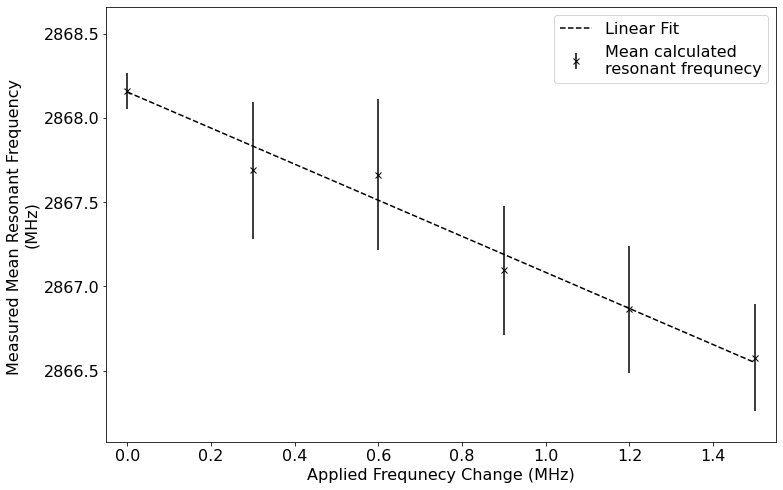

In [62]:
# Set the number of repeats per measurement. 
measurement_repeats = 7 

mean_frequency = []
std_freq_measurement = [] 

single_shot_measurement = []
single_shot_error = []

for i in range(int(len(measured_freq)/measurement_repeats)):
    mean_frequency.append(np.mean(measured_freq[(i*measurement_repeats):(i+1)*measurement_repeats]))
    std_freq_measurement.append(np.std(measured_freq[(i*measurement_repeats):(i+1)*measurement_repeats]))
    
    single_shot_measurement.append(measured_freq[i*measurement_repeats])
    single_shot_error.append(data['Error Calculated Res Freq (MHz) '][i*measurement_repeats])
    
print(mean_frequency)

applied_freq_change = [0, 0.300, 0.600, 0.900, 1.200, 1.500]
applied_freq_change = np.array(applied_freq_change)
P0 = [0,0]

fig, ax = plot.subplots()

ax.errorbar(applied_freq_change, mean_frequency, std_freq_measurement, marker = 'x', 
             linestyle = '', label = 'Mean calculated \nresonant frequnecy', color = 'k')

coeffs, confidence = opt.curve_fit(linear_equation, applied_freq_change, mean_frequency, P0, 
                                  sigma = std_freq_measurement)
error = np.sqrt(np.diag(confidence))

y = linear_equation(applied_freq_change, coeffs[0], coeffs[1])
ax.plot(applied_freq_change, y, linestyle = '--', 
         label = 'Linear Fit', color = 'k')

ax.set_xlabel('Applied Frequnecy Change (MHz)')
ax.set_ylabel('Measured Mean Resonant Frequency \n(MHz)')

ax.axis([-0.05, 1.55, np.min(mean_frequency)-0.5, np.max(mean_frequency)+0.5])
ax.legend()

print(coeffs)
print(error)

In [60]:
fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + 
           date + '\\' + date + '_Kuscko_mean_res_freq_shift' + '.pdf')

<ErrorbarContainer object of 3 artists>

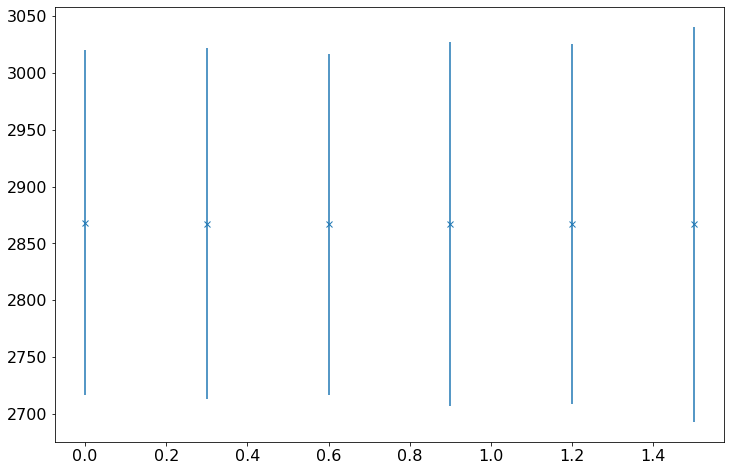

In [65]:
plot.errorbar(applied_freq_change, single_shot_measurement, single_shot_error, marker = 'x', linestyle = '')